# Supervised Learning: Linear Regression

### Getting and setting up the data.

Usual data analysis imports.

In [ ]:
import numpy as np
import pandas as pd

Imports for plotting

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Importing our data from CSV

In [ ]:
responses = pd.read_csv('/content/ML Data Collection (Responses) Final - Form Responses 1.csv')

Initial look at Data

In [ ]:
responses.head()

,Timestamp,What program are you in?,"Including your most recent co-op, how many co-op terms have you completed?",Which of the following best describes your position in your most recent co-op?,How much were you paid per hour in your most recent co-op?,Adjusted Pay,Was your position remote or in-person?,How many hours did you work per week (as per your contract)? Ex: 37.5,Had you held this position before (were you returning to the job)?,How did you obtain the job?,"When applying, was this position amongst your top choices?","Where was the position located? (If remote, where would you have worked if in person?)",How many other people were on your team? Ex: 4,Did you work closely with other co-ops?,Overall how much did you enjoy your most recent co-op?,Enjoyed
0,3/5/2022 17:46:59,Management Engineering,3,Project Manager,20.0,-2.55,Remote,37.5,No,WaterlooWorks,No,Toronto (GTA),10,No,4,1
1,3/5/2022 17:50:01,Management Engineering,3,Consultant,22.0,-0.55,Remote,37.5,No,WaterlooWorks,Yes,Toronto (GTA),7,No,4,1
2,3/5/2022 17:55:04,Management Engineering,3,Developer,25.0,2.45,Remote,37.5,No,WaterlooWorks,No,Toronto (GTA),7,No,3,0
3,3/5/2022 17:55:27,Management Engineering,3,Project Manager,23.5,0.95,Remote,37.5,No,WaterlooWorks,Yes,Toronto (GTA),4,No,5,1
4,3/5/2022 17:59:27,Management Engineering,3,Business Analyst,26.5,3.95,Remote,37.5,No,WaterlooWorks,Yes,Toronto (GTA),14,No,2,0


Renaming columns for ease of use

In [ ]:
#renaming was taken from: https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
responses = responses.set_axis(['Timestamp','Program','Coops Completed', 'Role', 'Pay', 'Adjusted Pay','WFH Status', 'Weekly Hours', 'Returning', 'Obtain Job', 'Top Choice', 'Location','Team Size', 'Other Co-ops', 'Enjoyment', 'Enjoyed'], axis=1, inplace=False)
responses.head()

,Timestamp,Program,Coops Completed,Role,Pay,Adjusted Pay,WFH Status,Weekly Hours,Returning,Obtain Job,Top Choice,Location,Team Size,Other Co-ops,Enjoyment,Enjoyed
0,3/5/2022 17:46:59,Management Engineering,3,Project Manager,20.0,-2.55,Remote,37.5,No,WaterlooWorks,No,Toronto (GTA),10,No,4,1
1,3/5/2022 17:50:01,Management Engineering,3,Consultant,22.0,-0.55,Remote,37.5,No,WaterlooWorks,Yes,Toronto (GTA),7,No,4,1
2,3/5/2022 17:55:04,Management Engineering,3,Developer,25.0,2.45,Remote,37.5,No,WaterlooWorks,No,Toronto (GTA),7,No,3,0
3,3/5/2022 17:55:27,Management Engineering,3,Project Manager,23.5,0.95,Remote,37.5,No,WaterlooWorks,Yes,Toronto (GTA),4,No,5,1
4,3/5/2022 17:59:27,Management Engineering,3,Business Analyst,26.5,3.95,Remote,37.5,No,WaterlooWorks,Yes,Toronto (GTA),14,No,2,0


In [ ]:
#more in depth look at the data
responses.dtypes

Timestamp           object
Program             object
Coops Completed      int64
Role                object
Pay                float64
Adjusted Pay       float64
WFH Status          object
Weekly Hours       float64
Returning           object
Obtain Job          object
Top Choice          object
Location            object
Team Size            int64
Other Co-ops        object
Enjoyment            int64
Enjoyed              int64
dtype: object

### Visualizing current data

Histograms

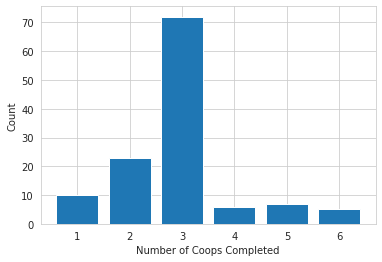

In [ ]:
# Histogram of prices (this is the target of our dataset)
# https://stackoverflow.com/questions/23246125/how-to-center-labels-in-histogram-plot
labels, counts = np.unique(responses['Coops Completed'], return_counts= True)
plt.bar(labels, counts, align='center')

#label
plt.xlabel('Number of Coops Completed')
plt.ylabel('Count')

plt.gca().set_xticks(labels)
plt.show()


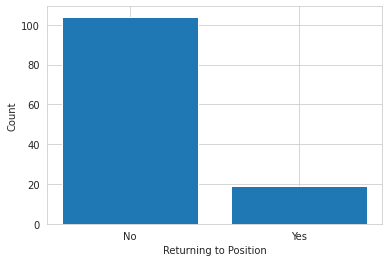

In [ ]:
# Histogram of prices (this is the target of our dataset)
# https://stackoverflow.com/questions/23246125/how-to-center-labels-in-histogram-plot
labels, counts = np.unique(responses['Returning'], return_counts= True)
plt.bar(labels, counts, align='center')

#label
plt.xlabel('Returning to Position')
plt.ylabel('Count')

plt.gca().set_xticks(labels)
plt.show()


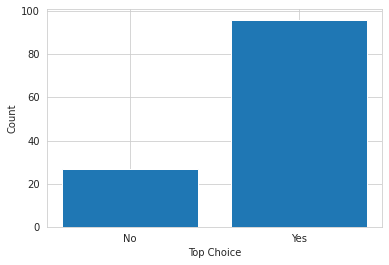

In [ ]:
# Histogram of prices (this is the target of our dataset)
# https://stackoverflow.com/questions/23246125/how-to-center-labels-in-histogram-plot
labels, counts = np.unique(responses['Top Choice'], return_counts= True)
plt.bar(labels, counts, align='center')

#label
plt.xlabel('Top Choice')
plt.ylabel('Count')

plt.gca().set_xticks(labels)
plt.show()

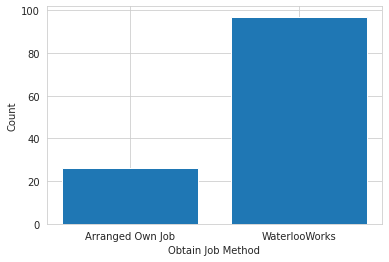

In [ ]:
# Histogram of prices (this is the target of our dataset)
# https://stackoverflow.com/questions/23246125/how-to-center-labels-in-histogram-plot
labels, counts = np.unique(responses['Obtain Job'], return_counts= True)
labels = ['Arranged Own Job', 'WaterlooWorks']
plt.bar(labels, counts, align='center')

#label
plt.xlabel('Obtain Job Method')
plt.ylabel('Count')

plt.gca().set_xticks(labels)
plt.show()

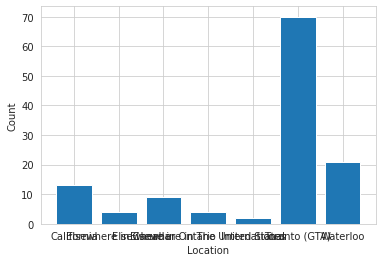

In [ ]:
# Histogram of prices (this is the target of our dataset)
# https://stackoverflow.com/questions/23246125/how-to-center-labels-in-histogram-plot
labels, counts = np.unique(responses['Location'], return_counts= True)
plt.bar(labels, counts, align='center')

#label
plt.xlabel('Location')
plt.ylabel('Count')

plt.gca().set_xticks(labels)
plt.show()

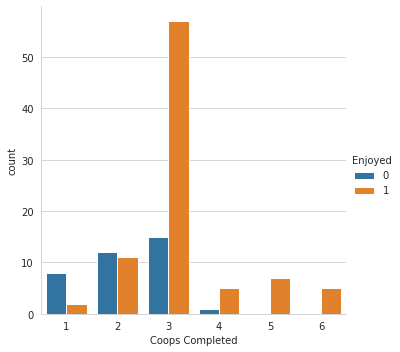

In [ ]:
sns.catplot(x='Coops Completed',kind='count',data=responses,hue='Enjoyed')

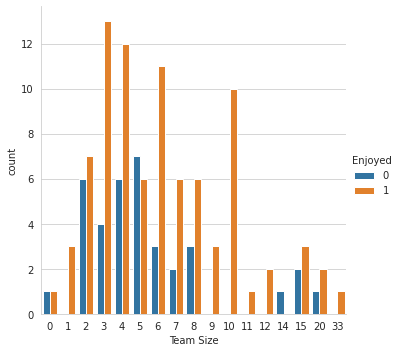

In [ ]:
sns.catplot(x='Team Size',kind='count',data=responses,hue='Enjoyed')

### Data Preparation

Dummies are created for all categorical variables, and a column is removed to address multicollinearity.

In [ ]:
role_dummies = pd.get_dummies(responses['Role'])
#dropping first column for multilinearity
role_dummies.drop(columns=role_dummies.columns[0], axis=1, inplace=True)

wfh_dummies = pd.get_dummies(responses['WFH Status'])
wfh_dummies.drop(columns=wfh_dummies.columns[0], axis=1, inplace=True)

return_dummies = pd.get_dummies(responses['Returning'])
return_dummies.drop(columns=return_dummies.columns[0], axis=1, inplace=True)


obtain_dummies = pd.get_dummies(responses['Obtain Job'])
obtain_dummies.drop(columns=obtain_dummies.columns[0], axis=1, inplace=True)

choice_dummies = pd.get_dummies(responses['Top Choice'])
choice_dummies.drop(columns=choice_dummies.columns[0], axis=1, inplace=True)

location_dummies = pd.get_dummies(responses['Location'])
location_dummies.drop(columns=location_dummies.columns[0], axis=1, inplace=True)

other_coop_dummies = pd.get_dummies(responses['Other Co-ops'])
other_coop_dummies.drop(columns=other_coop_dummies.columns[0], axis=1, inplace=True)

program_dummies = pd.get_dummies(responses['Program'])
program_dummies.drop(columns=program_dummies.columns[0], axis=1, inplace=True)

coop_completed_dummies = pd.get_dummies(responses['Coops Completed'])
coop_completed_dummies.drop(columns=coop_completed_dummies.columns[0], axis=1, inplace=True)

In [ ]:
#Renaming all the dummies that have Yes No as the column headers
return_dummies.columns=['Yes Return']
choice_dummies.columns=['Yes Choice']
other_coop_dummies.columns=['Yes Other Co-op']
coop_completed_dummies.columns=['1 Co-op Completed','2 Co-ops Completed','3 Co-op Completed','5 Co-op Completed','6 Co-op Completed']

In [ ]:
#Dropping the columns for which the dummies were created
X = responses.drop(['Coops Completed','WFH Status','Returning','Obtain Job','Top Choice','Location','Other Co-ops', 'Role', 'Program','Pay'], axis=1)

In [ ]:
#concat dummy dfs together
dummies = pd.concat([coop_completed_dummies, wfh_dummies,return_dummies,obtain_dummies,choice_dummies,location_dummies,other_coop_dummies,role_dummies, program_dummies],axis =1)

Concatenating all the DFs together

In [ ]:
X.head()

,Timestamp,Adjusted Pay,Weekly Hours,Team Size,Enjoyment,Enjoyed
0,3/5/2022 17:46:59,-2.55,37.5,10,4,1
1,3/5/2022 17:50:01,-0.55,37.5,7,4,1
2,3/5/2022 17:55:04,2.45,37.5,7,3,0
3,3/5/2022 17:55:27,0.95,37.5,4,5,1
4,3/5/2022 17:59:27,3.95,37.5,14,2,0


In [ ]:
dummies.head()

,1 Co-op Completed,2 Co-ops Completed,3 Co-op Completed,5 Co-op Completed,6 Co-op Completed,In-person,Remote,Yes Return,WaterlooWorks,Yes Choice,...,Computer Science,Environment and Business,Management Engineering,Mathematics/Financial Analysis and Risk Management,Mechanical Engineering,Mechatronics Engineering,Nanotechnology Engineering,Planning,Public Health,Software Engineering
0,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
X = pd.concat([X,dummies], axis = 1)
X = X.drop(['Timestamp','Enjoyment','Enjoyed'], axis=1)
#we can see dummies and x have been combined
X.head()

,Adjusted Pay,Weekly Hours,Team Size,1 Co-op Completed,2 Co-ops Completed,3 Co-op Completed,5 Co-op Completed,6 Co-op Completed,In-person,Remote,...,Computer Science,Environment and Business,Management Engineering,Mathematics/Financial Analysis and Risk Management,Mechanical Engineering,Mechatronics Engineering,Nanotechnology Engineering,Planning,Public Health,Software Engineering
0,-2.55,37.5,10,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,-0.55,37.5,7,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,2.45,37.5,7,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0.95,37.5,4,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,3.95,37.5,14,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


Creating Y

In [ ]:
Y = np.ravel(responses['Enjoyed'])
Y

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1])

### Logistic Regression First Attempt


In [ ]:
# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluating our ML results
from sklearn import metrics


In [ ]:
# Create LogisticRegression model
log_model = LogisticRegression()

# Fit our data
log_model.fit(X,Y)

# Check our accuracy
log_model.score(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8943089430894309

In [ ]:
#determining Y mean to compare the mode to a model that only answer 1( or 0)
Y.mean()

0.7073170731707317

In [ ]:
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df = pd.DataFrame(zip(X.columns,np.transpose(log_model.coef_)))
coeff_df

,0,1
0,Adjusted Pay,[0.01978642096018233]
1,Weekly Hours,[-0.027562302720105448]
2,Team Size,[0.0436029228095964]
3,1 Co-op Completed,[-0.5142333354824011]
4,2 Co-ops Completed,[0.49059731809032914]
5,3 Co-op Completed,[0.21433909459087666]
6,5 Co-op Completed,[1.1147153948201283]
7,6 Co-op Completed,[0.5312915743167512]
8,In-person,[0.7144554554666873]
9,Remote,[-0.3563773119633859]


### Testing and Training Data Sets First attempt


In [ ]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

# Make a new log_model
log_model2 = LogisticRegression()

# Now fit the new model
log_model2.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Predict the classes of the testing data set
class_predict = log_model2.predict(X_test)


# Compare the predicted classes to the actual test classes
metrics.accuracy_score(Y_test,class_predict)

0.7741935483870968

### Second attempt

Here we try with regular pay, not adjusted

In [ ]:
X = pd.concat([X,responses['Pay']], axis = 1)
X = X.drop(['Adjusted Pay'], axis = 1)
X.head()

,Weekly Hours,Team Size,1 Co-op Completed,2 Co-ops Completed,3 Co-op Completed,5 Co-op Completed,6 Co-op Completed,In-person,Remote,Yes Return,...,Environment and Business,Management Engineering,Mathematics/Financial Analysis and Risk Management,Mechanical Engineering,Mechatronics Engineering,Nanotechnology Engineering,Planning,Public Health,Software Engineering,Pay
0,37.5,10,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,20.0
1,37.5,7,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,22.0
2,37.5,7,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,25.0
3,37.5,4,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,23.5
4,37.5,14,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,26.5


In [ ]:
# Create LogisticRegression model
log_model3 = LogisticRegression()

# Fit our data
log_model3.fit(X,Y)

# Check our accuracy
log_model3.score(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8943089430894309

In [ ]:
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df = pd.DataFrame(zip(X.columns,np.transpose(log_model3.coef_)))
coeff_df

,0,1
0,Weekly Hours,[-0.04498967174219503]
1,Team Size,[0.04299171602698239]
2,1 Co-op Completed,[-0.485148814071522]
3,2 Co-ops Completed,[0.46891214809552684]
4,3 Co-op Completed,[0.1833629621954539]
5,5 Co-op Completed,[1.1155050290225024]
6,6 Co-op Completed,[0.4384091999566626]
7,In-person,[0.7028995106206715]
8,Remote,[-0.39104392421901923]
9,Yes Return,[1.3165343486638956]


In [ ]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

# Make a new log_model
log_model4 = LogisticRegression()

# Now fit the new model
log_model4.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Predict the classes of the testing data set
class_predict = log_model4.predict(X_test)


# Compare the predicted classes to the actual test classes
metrics.accuracy_score(Y_test,class_predict)

0.8709677419354839

### Third attempt

Now only looking at the features of the job, thus elimnating program, how the coop was obtained, top choice, returning and previous coops, but keeping objective pay

In [ ]:
X = responses.drop(['Timestamp','Adjusted Pay','WFH Status','Returning','Obtain Job','Top Choice','Location','Other Co-ops', 'Role', 'Program','Enjoyment','Enjoyed' ,'Coops Completed'], axis=1)

X = pd.concat([X,role_dummies, wfh_dummies, location_dummies, other_coop_dummies], axis = 1)

X.head()

,Pay,Weekly Hours,Team Size,Business Analyst,Business Development,Consultant,Data Administrator,Data Science / Analyst,Designer,Developer,...,Systems Engineer,In-person,Remote,Elsewhere in Canada,Elsewhere in Ontario,Elsewhere in The United States,International,Toronto (GTA),Waterloo,Yes Other Co-op
0,20.0,37.5,10,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,22.0,37.5,7,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,25.0,37.5,7,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,23.5,37.5,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,26.5,37.5,14,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
# Create LogisticRegression model
log_model5 = LogisticRegression()

# Fit our data
log_model5.fit(X,Y)

# Check our accuracy
log_model5.score(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7804878048780488

In [ ]:
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df = pd.DataFrame(zip(X.columns,np.transpose(log_model5.coef_)))
coeff_df

,0,1
0,Pay,[0.07200765908160424]
1,Weekly Hours,[-0.03396585529901417]
2,Team Size,[0.048142166414023115]
3,Business Analyst,[-0.2370104305024875]
4,Business Development,[-0.14381718156947104]
5,Consultant,[0.5866120713224783]
6,Data Administrator,[-0.5729880849183661]
7,Data Science / Analyst,[0.5388286294656802]
8,Designer,[0.025646784600606935]
9,Developer,[0.04695541953684275]


In [ ]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

# Make a new log_model
log_model6 = LogisticRegression()

# Now fit the new model
log_model6.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Predict the classes of the testing data set
class_predict = log_model6.predict(X_test)


# Compare the predicted classes to the actual test classes
metrics.accuracy_score(Y_test,class_predict)

0.7096774193548387

### Fouth attempt

Now only looking at the features of the individual


In [ ]:
X = responses.drop(['Coops Completed','Timestamp','Weekly Hours','Team Size','Adjusted Pay','Pay','WFH Status','Returning','Obtain Job','Top Choice','Location','Other Co-ops', 'Role', 'Program','Enjoyment','Enjoyed' ], axis=1)

X = pd.concat([X,obtain_dummies, choice_dummies, program_dummies, return_dummies,coop_completed_dummies], axis = 1)

X.head()

,WaterlooWorks,Yes Choice,Actuarial Science,Biomedical Engineering,Chemical Engineering,Computer Science,Environment and Business,Management Engineering,Mathematics/Financial Analysis and Risk Management,Mechanical Engineering,...,Nanotechnology Engineering,Planning,Public Health,Software Engineering,Yes Return,1 Co-op Completed,2 Co-ops Completed,3 Co-op Completed,5 Co-op Completed,6 Co-op Completed
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Create LogisticRegression model
log_model7 = LogisticRegression()

# Fit our data
log_model7.fit(X,Y)

# Check our accuracy
log_model7.score(X,Y)

0.8373983739837398

In [ ]:
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df = pd.DataFrame(zip(X.columns,np.transpose(log_model7.coef_)))
coeff_df

,0,1
0,WaterlooWorks,[0.18312008348510858]
1,Yes Choice,[1.3979669770553629]
2,Actuarial Science,[-0.6553033815839795]
3,Biomedical Engineering,[0.050346934007657405]
4,Chemical Engineering,[-0.06774951966680304]
5,Computer Science,[-1.0355953400054958]
6,Environment and Business,[0.2689588828614249]
7,Management Engineering,[-0.03171510293712385]
8,Mathematics/Financial Analysis and Risk Manage...,[0.18503469745047477]
9,Mechanical Engineering,[-0.2798151595168918]


In [ ]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

# Make a new log_model
log_model8 = LogisticRegression()

# Now fit the new model
log_model8.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
# Predict the classes of the testing data set
class_predict = log_model8.predict(X_test)


# Compare the predicted classes to the actual test classes
metrics.accuracy_score(Y_test,class_predict)

0.7419354838709677

### Fifth Attempt


Looking at the most impactful features from first try


In [ ]:
X = responses.drop(['Coops Completed','Timestamp','WFH Status','Returning','Obtain Job','Top Choice','Location','Other Co-ops', 'Role', 'Program','Enjoyment','Enjoyed','Team Size', 'Adjusted Pay', 'Pay','Weekly Hours' ], axis=1)

X = pd.concat([X,wfh_dummies,return_dummies,choice_dummies, role_dummies, location_dummies,coop_completed_dummies], axis = 1)

X.head()

,In-person,Remote,Yes Return,Yes Choice,Business Analyst,Business Development,Consultant,Data Administrator,Data Science / Analyst,Designer,...,Elsewhere in Ontario,Elsewhere in The United States,International,Toronto (GTA),Waterloo,1 Co-op Completed,2 Co-ops Completed,3 Co-op Completed,5 Co-op Completed,6 Co-op Completed
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,1,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
# Create LogisticRegression model
log_model9 = LogisticRegression()

# Fit our data
log_model9.fit(X,Y)

# Check our accuracy
log_model9.score(X,Y)

0.8536585365853658

In [ ]:
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df = pd.DataFrame(zip(X.columns,np.transpose(log_model9.coef_)))
coeff_df

,0,1
0,In-person,[0.7823804979391359]
1,Remote,[-0.21694885750926138]
2,Yes Return,[1.280216425294518]
3,Yes Choice,[1.3693590289086894]
4,Business Analyst,[-0.3092252855149335]
5,Business Development,[-0.017439581795107156]
6,Consultant,[0.4990025626315412]
7,Data Administrator,[-0.6217264311245814]
8,Data Science / Analyst,[0.5735328277964264]
9,Designer,[0.24961834033365013]


In [ ]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

# Make a new log_model
log_model10 = LogisticRegression()

# Now fit the new model
log_model10.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
# Predict the classes of the testing data set
class_predict = log_model10.predict(X_test)


# Compare the predicted classes to the actual test classes
metrics.accuracy_score(Y_test,class_predict)

0.8387096774193549